### Bir işletmenin iki yıl boyunca satış verilerini analiz edeceğiz. Amacımız, işletmenin satışlarındaki değişimler hakkinda bir hipotez testi yapmaktır. 

# Veri Setinin Oluşturulması

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, mannwhitneyu, ttest_ind

In [3]:
# veri setini oluşturalım.

# İşletmenin birinci yıl satış verileri
sales_1 = [25000, 30000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000]

# İşletmenin ikinci yıl satış verileri
sales_2 = [35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000]

sales = pd.DataFrame({
    'year_1':sales_1, 'year_2':sales_2
})

sales.head()

,year_1,year_2
0,25000,35000
1,30000,40000
2,40000,45000
3,45000,50000
4,50000,55000


# Veri Seti Ön Analiz

In [4]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
year_1,12.0,56666.666667,19345.346320,25000.0,43750.0,57500.0,71250.0,85000.0
year_2,12.0,62500.000000,18027.756377,35000.0,48750.0,62500.0,76250.0,90000.0


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year_1  12 non-null     int64
 1   year_2  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


# Veri Setinin Görselleştirilmesi

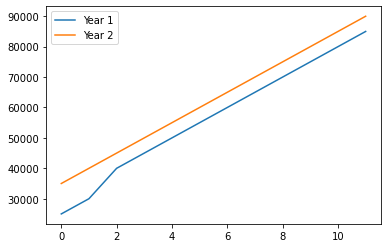

In [6]:
plt.plot(sales['year_1'], label='Year 1')
plt.plot(sales['year_2'], label='Year 2')
plt.legend()
plt.show()

# İstatistiksel Testler

#### Hipotez testi yapmadan önce, verilerin normal dağılım gösterip göstermediğini kontrol etmeliyiz. Veri görselleştirme ile yukarıda normal dağılıyor fikri uyandı fakat istatistiksel olarak test edip bilimsel sonucu elde etmeliyiz. Bu amaçla, Shapiro-Wilk testini kullanabiliriz.

In [7]:
# ilk yılın satış verilerinin normal dağılım testi

stat, p = shapiro(sales['year_1'])
print('Year 1:\nStatistic=%.3f, P-value=%.3f' % (stat, p))

print('---------------------------------------------------')

stat, p = shapiro(sales['year_2'])
print('Year 2:\nStatistic=%.3f, P-value=%.3f' % (stat, p))

Year 1:
Statistic=0.970, P-value=0.911
---------------------------------------------------
Year 2:
Statistic=0.967, P-value=0.876


#### P-value değerleri 0.05 'den büyük olduğu için verilerin normal dağıldığını söyleyebiliriz. Bu durumda, veriler normal dağılım gösterdiği için T-testi veya Z-testi yapabiliriz.

#### T-testi: popülasyon ortalaması ve standart sapmasının bilinmediği durumlarda yapılan testtir.
#### Z-testi. popülasyon ortalaması ve standart sapmasının bilindiği durumlarda yapılan testtir.

#### Bu durumdan dolayı T-testi yapacağız.

## Hipotezlerimiz:

#### H0: İki yıl arasında anlamlı bir fark yoktur.
#### H1: İki yıl arasında anlamlı bir fark vardır.

In [9]:
t_stat, p_value = ttest_ind(sales['year_1'], sales['year_2'])
print(f'Statistic = %.3f\nP-value = %.3f' % (t_stat, p_value))

Statistic = -0.764
P-value = 0.453


In [11]:
# Hipotezin kabul edilip edilmeyeceğinin belirlenmesi

alpha = 0.05

if p_value > alpha:
    print('İki yıl arasında anlamlı bir fark yoktur (H0 reddedilemez)')
else:
    print('İki yıl arasında anlamlı bir fark vardır (H0 reddedilir.)')

İki yıl arasında anlamlı bir fark yoktur (H0 reddedilemez)
